[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/ds-reboot/python-first-part/blob/main/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import requests

## Список объектов

In [2]:
#Скачивание кусками в словарь
dct = {}
part_ = 1
for offset_ in range(1, 15000, 5000):
    limit_ = offset_ + 4999
    print(f'{offset_}:{limit_}')
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    data = res.json()
    dct.update({part_: data})
    part_ += 1

1:5000
5001:10000
10001:15000


In [3]:
#Все в один лист кидаем
lst_ = list()
for i in dct.keys():
    objects_list = dct[i].get('data').get('list')
    lst_ += objects_list
objids = [x.get('objId') for x in lst_]

# Данные по определенному объекту

In [4]:
# Для скачивания данных по определенному объекту, нужно добавить его id в конец строки запроса
import pandas as pd
pd_ = pd.DataFrame()
#j = 0
for i in objids:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}'
    res = requests.get(url)
    js_res = res.json()
    temp_pd = pd.json_normalize(js_res)
    pd_ = pd.concat([pd_,temp_pd])

In [7]:
df = pd_.applymap(str)
df = df.fillna('')

In [12]:
df = df.reset_index(drop=True)
df

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,0,28071,99284,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11098,0,28072,96379,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11099,0,28073,96446,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11100,0,44447,475093,2538,ЯРОСЛАВЛЬЗАКАЗЧИК,ЯРОСЛАВЛЬЗАКАЗЧИК,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЯРОСЛАВЛЬЗАКАЗЧИК,0,1,3,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [141]:
#ищем среднюю цену за кв. метр по регионам
regions = df['data.developer.regRegionDesc'].unique()
avg_price = dict()


for city in regions:
    if str(city) == 'nan':
        continue
    df_1 = df.loc[(df['data.developer.regRegionDesc'] == city) & ~(df['data.objPriceAvg'].str.contains('nan'))]
    df_1 = df_1.drop_duplicates()
    df_1 = df_1.astype({'data.objPriceAvg':'float'})
    temp = {city: df_1['data.objPriceAvg'].mean()}
    avg_price.update(temp)
    #print(len(df_1))
    #print(city)
    #break
avg_price = sorted(avg_price.items(), key=lambda x: x[1], reverse=True)
#avg_price


In [142]:
#top-20 for chart
avg_price = dict(avg_price[:20])

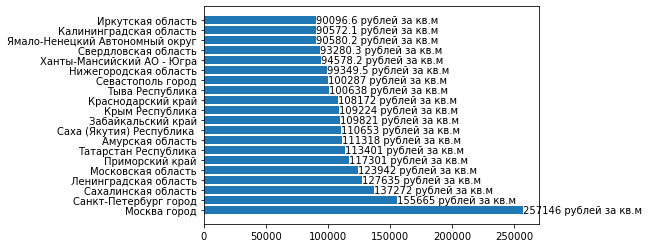

In [175]:
#Средняя цена квадратного метра по регионам (ограничил 20 регионами, чтобы все читалось на графике)
import matplotlib.pyplot as plt

bars = plt.barh(list(avg_price.keys()), list(avg_price.values()))
plt.bar_label(bars, fmt='%g рублей за кв.м')
plt.show()

In [171]:
#Объем вводимого жилья по регионам и годам
import datetime

regions = df['data.developer.regRegionDesc'].unique()
square_living = dict()


for city in regions:
    if str(city) == 'nan':
        continue
    df_2 = df.loc[(df['data.developer.regRegionDesc'] == city)]
    df_2 = df_2.drop_duplicates()
    df_2['data.objReady100PercDt'] = df_2['data.objReady100PercDt'].apply(pd.to_datetime)
    #цикл по годам внутри города
    years = df_2['data.objReady100PercDt'].dt.year.unique()
    for year in years:
        df_temp = df_2.loc[df_2['data.objReady100PercDt'].dt.year == year]
        city_year = str(city) + ' ' + str(year)
        df_temp = df_temp.astype({'data.objSquareLiving':'float'})
        temp = {city_year: df_temp['data.objSquareLiving'].sum()}
        square_living.update(temp)

square_living = sorted(square_living.items(), key=lambda x: x[1], reverse=True)

#square_living
#дата 100 процентной готовности жилья-data.objReady100PercDt
#площадь жилья - data.objSquareLiving

In [172]:
#top-20
square_living = dict(square_living[:20])

In [173]:
#делим все значения на миллион, для красивой цифры
for key in square_living.keys():
    square_living[key] = round(square_living[key]/1000000, 1)

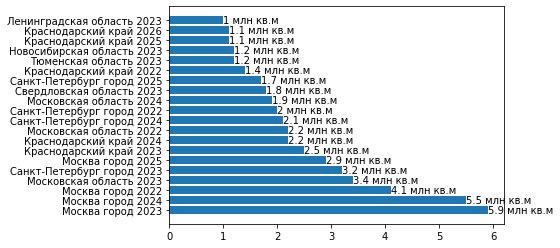

In [174]:
bars = plt.barh(list(square_living.keys()), list(square_living.values()))
plt.bar_label(bars, fmt='%g млн кв.м')
plt.show()

In [182]:
#Теперь сравним Этажность домов, количество квартир, количество парковочных мест по регионам
# - data.objFlatCnt - количество квартир, data.floorMax = количество этажей, data.objElemParkingCnt - количество 
# парковочных мест

regions = df['data.developer.regRegionDesc'].unique()
parking = dict()
flats = dict()
floors = dict()


for city in regions:
    if str(city) == 'nan':
        continue
    df_1 = df.loc[(df['data.developer.regRegionDesc'] == city)]
    df_1 = df_1.drop_duplicates()
    df_1 = df_1.astype({'data.objFlatCnt':'float', 'data.floorMax':'int', 'data.objElemParkingCnt': 'int'})
    temp_flat = {city: df_1['data.objFlatCnt'].sum()}
    temp_floor = {city: df_1['data.floorMax'].max()} #макс этаж ищем по региону
    temp_parking = {city: df_1['data.floorMax'].sum()}
    
    parking.update(temp_parking)
    flats.update(temp_flat)
    floors.update(temp_floor)


parking = sorted(parking.items(), key=lambda x: x[1], reverse=True)
flats = sorted(flats.items(), key=lambda x: x[1], reverse=True)
floors = sorted(floors.items(), key=lambda x: x[1], reverse=True)

In [200]:
parking = dict(parking[:20])

In [201]:
flats = dict(flats[:20])

In [202]:
floors = dict(floors[:20])

In [206]:
parking

{'Москва город': 19934,
 'Краснодарский край': 11465,
 'Санкт-Петербург город': 8846,
 'Московская область': 8542,
 'Свердловская область': 5964,
 'Новосибирская область': 5467,
 'Башкортостан Республика': 4208,
 'Приморский край': 3176,
 'Тюменская область': 3168,
 'Ростовская область': 2998,
 'Татарстан Республика': 2863,
 'Самарская область': 2596,
 'Ленинградская область': 2538,
 'Воронежская область': 2298,
 'Красноярский край': 2130,
 'Пермский край': 2060,
 'Удмуртская Республика': 2038,
 'Челябинская область': 1966,
 'Нижегородская область': 1828,
 'Крым Республика': 1819}

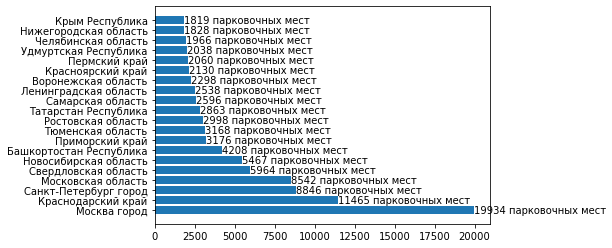

In [207]:
bars = plt.barh(list(parking.keys()), list(parking.values()))
plt.bar_label(bars, fmt='%g парковочных мест')
plt.show()

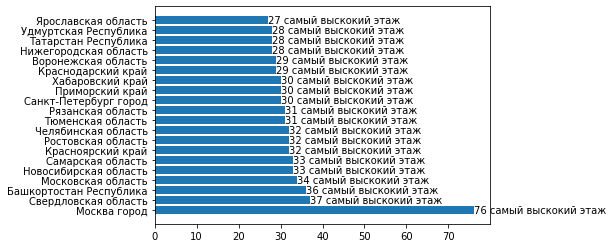

In [208]:
bars = plt.barh(list(floors.keys()), list(floors.values()))
plt.bar_label(bars, fmt='%g самый выскокий этаж')
plt.show()

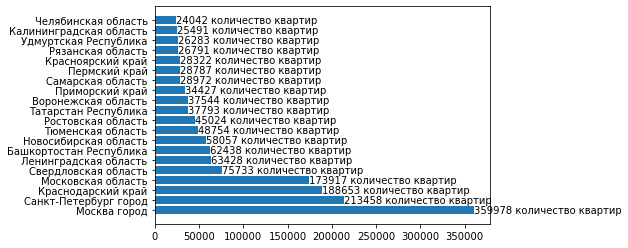

In [209]:
#исходя из графиков выше видно, что Москва по Многим показателям опережает другие регионы в разы. По количеству квартир в
#топ 5 также попал и Красндораский край. В целом активный рынок строящегося жилья в Москве, Питере, Краснодаре ...
bars = plt.barh(list(flats.keys()), list(flats.values()))
plt.bar_label(bars, fmt='%g количество квартир')
plt.show()